In [1]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version : ", tf.__version__)
print("Eager mode : ", tf.executing_eagerly())
print("Hub version : ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT ABAILABLE")

Version :  2.3.0
Eager mode :  True
Hub version :  0.9.0
GPU is available


In [2]:
# load : 목표 데이터 이름, split=None이면 모든 train, test데이터를 딕셔너리로 반환, 
# as_supervised=True면 (input, label)형태로 반환, False면 딕셔너리 형태로 반환 
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size = -1, as_supervised=True)
train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteGBEPM0/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteGBEPM0/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteGBEPM0/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
print("Training entries: {}, Test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 25000, Test entries: 25000


In [4]:
train_data[:10]

(<tf.Tensor: shape=(25000,), dtype=string, numpy=
 array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
        b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I

In [6]:
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[],
                           dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [7]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [11]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [19]:
history = model.fit(partial_x_train, partial_y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 57ms/step - loss: 0.0268 - accuracy: 0.9977 - val_loss: 0.4477 - val_accuracy: 0.8641
Epoch 2/40
30/30 [==============================] - 2s 54ms/step - loss: 0.0250 - accuracy: 0.9979 - val_loss: 0.4541 - val_accuracy: 0.8642
Epoch 3/40
30/30 [==============================] - 2s 54ms/step - loss: 0.0234 - accuracy: 0.9983 - val_loss: 0.4613 - val_accuracy: 0.8633
Epoch 4/40
30/30 [==============================] - 2s 54ms/step - loss: 0.0221 - accuracy: 0.9985 - val_loss: 0.4679 - val_accuracy: 0.8643
Epoch 5/40
30/30 [==============================] - 2s 54ms/step - loss: 0.0207 - accuracy: 0.9985 - val_loss: 0.4755 - val_accuracy: 0.8631
Epoch 6/40
30/30 [==============================] - 2s 54ms/step - loss: 0.0194 - accuracy: 0.9987 - val_loss: 0.4828 - val_accuracy: 0.8621
Epoch 7/40
30/30 [==============================] - 2s 54ms/step - loss: 0.0181 - accuracy: 0.9988 - val_loss: 0.4896 - val_accuracy: 0.8623
Epoch 8/40
30

In [21]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 5s 6ms/step - loss: 0.7583 - accuracy: 0.8408
[0.7582969665527344, 0.8408399820327759]


In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

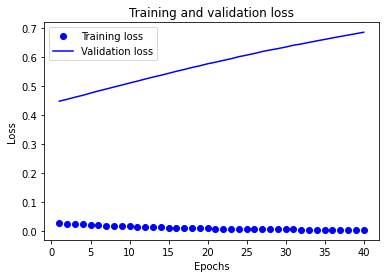

In [23]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
val_loss = history_dict['val_loss']
loss = history_dict['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') # bo : blue dot
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

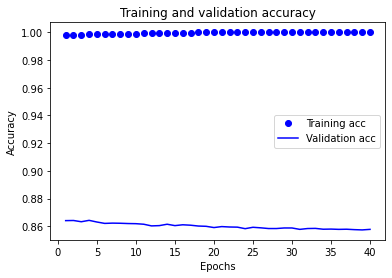

In [24]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()